# <center> ATM S 321 Climate Communication Project
## <center> Understanding Insolation on Earth
#### <center> _Josh Bostock, jbostock@uw.edu_
#### To begin, select **RESTART AND RUN ALL** from the **KERNEL** menu in the top-left corner (this allows sliders)

## Introduction

This interactive notebook is designed to explain key concepts in climate science by exploring how insolation drives Earth's energy budget. Included are code, plots, and embedded animations that help visualise some fundamental processes:

- Earth's emission temperature and how this differs to its observed temperature
- How Earth's reflectivity (albedo) influences its temperature
- The surface temperature of the land and oceans over time
- The seasonal and latitudinal variation in incoming solar radiation

The notebook allows users to experiment with albedo, latitude, and time of year to understand how sensitive the climate system is to these parameters.

$$-*-$$

The first two code cells import the needed functions and lay out some constants that are used. These should be kept as they are.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from ipywidgets import interact, FloatSlider, IntSlider, SelectionSlider
from IPython.display import HTML
####
from functions import emission_temp, energy_budget, show_animation, avg_daily_insolation, plot_Q, insol_by_lat_day

In [2]:
#constants
sigma = 5.67*10**(-8)  # W/m^2/K^4
albedo = 0.3
S_true = 1360          # W/m^2
T_obs = 288            # K
lat_Seattle = 47.6061  # degrees

$$-*-$$

## <center> Energy Budget of Earth

The emission temperature is the theoretical temperature a planet would have if it radiated as a perfect blackbody, with no atmosphere to trap heat. This is based on the balance between incoming absorbed shortwave radiation, and outgoing reflected shortwave and emitted longwave radiation.

The emission temperature, $T_e$, is calculated as:

$$
T_e = \left( \frac{S_0 (1 - \alpha)}{4 \sigma} \right)^{1/4}
$$

Where:
- $ S_0 $ is the solar constant (total solar insolation; for Earth, $S_0$ $\approx$ 1360 W/m$^2$),
- $ \alpha $ is the planet's albedo (measure of reflectivity),
- $ \sigma $ is the Stefan–Boltzmann constant.

This model helps to understand why Earth's observed surface temperature is higher than the emission temperature, due to the greenhouse effect.

The interactive bar chart below visualises the flow of energy on Earth. The three bars represent:

- **Reflected solar**: Shortwave radiation reflected back to space due to clouds, ice, and land surfaces.
- **Absorbed solar**: Shortwave radiation absorbed by the planet's surface and atmosphere.
- **Outgoing longwave**: Infrared energy emitted by Earth into space.

The bar chart also overlays observed values (Fig. 2.4 in Hartmann, 2015) to show the differences between the model and measured values. These differences are primarily due to atmospheric greenhouse gases not taken into account.

$$-*-$$

Here is Table 4.2 (Hartmann, 2015), showing typical albedos for a variety of surface types for ideas of values to play around with.

| **Surface type**                              | **Typical albedo, $\alpha$** |
|-----------------------------------------------|------------------------------|
| **Water**                                     | **0.1**                      |
| Deep water: low wind, low altitude            | 0.07                         |
| Deep water: high wind, high altitude          | 0.12                         |
| **Bare surfaces**                             | **0.2**                      |
| Moist dark soil, high humus                   | 0.10                         |
| Moist gray soil                               | 0.15                         |
| Dry soil, desert                              | 0.30                         |
| Wet sand                                      | 0.25                         |
| Dry light sand                                | 0.35                         |
| Asphalt pavement                              | 0.07                         |
| Concrete pavement                             | 0.20                         |
| **Vegetation**                                | **0.2**                      |
| Short green vegetation                        | 0.17                         |
| Dry vegetation                                | 0.25                         |
| Coniferous forest                             | 0.12                         |
| Deciduous forest                              | 0.17                         |
| **Snow and ice**                              | **0.7**                      |
| Forest with surface snow cover                | 0.25                         |
| Sea ice, no snow cover                        | 0.30                         |
| Old, melting snow                             | 0.50                         |
| Dry, cold snow                                | 0.70                         |
| Fresh, dry snow                               | 0.80                         |
<center> Table 4.2: typical albedos for surface types </center>

In [3]:
#for formatting sliders
autol = {'width': 'auto'}
autos = {'description_width': 'auto'}

#interactive plot
interact(energy_budget, \
         S=IntSlider(min=1200, max=1500, step=5, value=S_true, \
                     style=autos, layout=autol, description='Total solar irradiance (W/m$^2$)'), \
         a=FloatSlider(min=0, max=1, step=0.01, value=albedo, description='Albedo', \
                      style=autos, layout=autol));

interactive(children=(IntSlider(value=1360, description='Total solar irradiance (W/m$^2$)', layout=Layout(widt…

$$-*-$$

## <center> Surface Temperature of the Land

These maps show monthly daytime land-surface temperatures based on MODIS imagery. The measurements shown here represent the temperature of the "skin" (or top 1 millimetre) of the land surface during the daytime—including bare land, snow or ice cover, and surface air temperature may be quite different. Yellow indicates the warmest temperatures (45°C) and light blue the coldest (< -25°C).

Data provided by NASA/Earth Observatory; animation from [The Atmospheric General Circulation, Wallace et al. (2023)](https://animations.atmos.uw.edu/#SST%20and%20land%20temperature)

In [4]:
show_animation("https://animations.atmos.uw.edu/ch1/1_4-8_skin_temperature_over_land.mp4")

$$-*-$$

## <center> Surface Temperature of the Oceans

This animation is a tour of the world oceans spanning 4+ years featuring the Jet Propulsion Laboratory (JPL) SST Analysis. It portrays the role of the ocean in the atmospheric general circulation: showing the warm pool, the western boundary currents, SST fronts with their slowly evolving eddies and meanders, the equatorial cold tongues, tropical instability waves, coastal upwelling, and the large-scale, high frequency response to bursts of atmospheric forcing.

Data provided by NASA/SVS; animation from [The Atmospheric General Circulation, Wallace et al. (2023)](https://animations.atmos.uw.edu/#SST%20and%20land%20temperature)

In [5]:
show_animation("https://animations.atmos.uw.edu/ch1/1_4-7_SST_2016-2020.mp4")

$$-*-$$

## <center> Average Daily Insolation

Insolation refers to the amount of solar radiation received per unit area. The average daily insolation, $ Q $, on a horizontal surface at a given latitude and day of the year is calculated using the following steps, as shown in Hartmann (2015):

---

**Calculate the day angle, $ \theta_d $, in radians:**
$$
\theta_d = \frac{2\pi d_n}{365}
$$

Where $d_n$ is the day number (from 0 to 364).

---

**Calculate solar declination, $ \delta $, and the Earth-Sun distance ratio, $ \left( \frac{\overline{d}}{d} \right)^2 $, using Fourier approximations:**
$$
\begin{aligned}
\delta = \sum_{n=0}^{3} a_n \cos(n\theta_d) + b_n \sin(n\theta_d) \\
\left( \frac{\overline{d}}{d} \right)^2 = \sum_{n=0}^{2} f_n \cos(n\theta_d) + g_n \sin(n\theta_d)
\end{aligned}
$$

Where $a_n$, $b_n$, $f_n$, $g_n$ are constants (see pp. 354-355 in Hartmann, 2015).

---

**Calculate the hour angle, $ h_0 $, accounting for polar day/night:**

$$
k = -\tan(\phi)\tan(\delta)
$$

$$
h_0 = 
\begin{cases}
0 & \text{if } k > 1 \quad \quad \text{(polar night)} \\
\pi & \text{if } k < -1 \quad \quad \text{(polar day)} \\
\arccos k & \text{otherwise} \quad \quad \text{(sunrise and sunset occur)}
\end{cases}
$$

---

**Finally, calculate the daily average insolation, $ Q $, in W/m$^2$:**

$$
Q = \frac{S_0}{\pi} \left( \frac{\overline{d}}{d} \right)^2 \left[ h_0 \sin(\phi)\sin(\delta) + \cos(\phi)\cos(\delta)\sin(h_0) \right]
$$

Where:
- $ S_0 $ is the total solar insolation,
- $ \phi $ is the latitude in radians,
- $ \delta $ is the solar declination in radians,
- $ h_0 $ is the solar hour angle in radians.

---

This helps explain that the equator is warmer on average, and extreme insolation values are at the poles during the solstices.

$$-*-$$

This heatmap shows how the daily insolation changes throughout the year and by latitude.

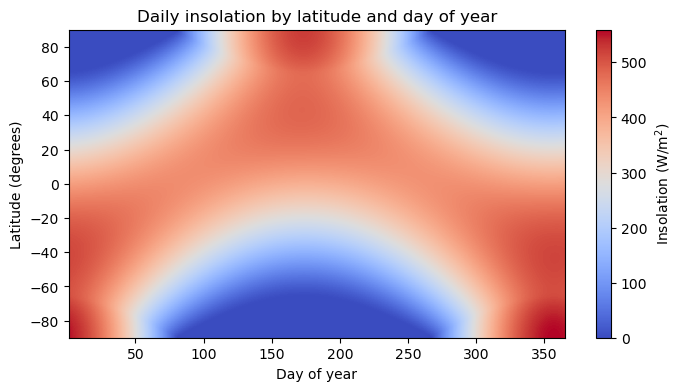

In [6]:
insol_by_lat_day()

$$-*-$$

This plot shows how the daily insolation changes throughout the year at a given latitude. Whilst adjusting the latitude, day of the year and solar constant, note some key points:

- The average daily insolations are stable at the equator,
- There is seasonality in the mid-latitudes,
- The presence of polar extremes during the polar days and nights.

A vertical dashed line marks the selected day in the slider.

In [7]:
#interactive plot
interact(plot_Q, \
         S=IntSlider(min=1200, max=1500, step=10, value=S_true, layout=autol, \
                     description='Total solar irradiance (W/m$^2$)', style=autos), \
         lat_deg=FloatSlider(min=-90., max=90., step=1, value=lat_Seattle, description='Latitude (degrees)', \
                             style=autos, layout=autol), \
         date=IntSlider(min=1, max=365, step=1, value=286, description='Day of year', \
                       style=autos, layout=autol));

interactive(children=(IntSlider(value=1360, description='Total solar irradiance (W/m$^2$)', layout=Layout(widt…

$$-*-$$

## Conclusion

This notebook explored the effects of insolation on Earth’s climate, focusing on the planet’s energy balance. This includes investigating the emission temperature of Earth, average daily insolation as a function of latitude and time of year, and the evolution of the temperature of the land and oceans.

Here are some key takeaways from the adjustable parameters and the plots:

- **Emission temperature**: the temperature a planet would have based solely on incoming and outgoing radiation, without accounting for atmospheric effects like greenhouse gases. This helps with understanding the gap between theoretical and observed temperatures.

- **Albedo**: different surface types reflect sunlight differently, influencing how much insolation is absorbed, and in turn dramatically influencing the Earth's temperature.

- **Daily insolation**: the angle of the Sun is the sky drives dramatic seasonal changes in insolation received at different latitudes.

- **Global patterns**: the animations visualised land and sea surface temperature data, showing how energy redistributes across the globe, highlighting key climate processes like upwelling, seasonal shifts, and equatorial warming.

These models and visualisations help show how insolation powers the climate system. Understanding the effects of such parameters is crucial for analysing modern climate trends and preparing for further global warming.

## References

[Hartmann, D.L., 2015. Global physical climatology (Vol. 103). Newnes.](https://books.google.com/books?hl=en&lr=&id=RsScBAAAQBAJ&oi=fnd&pg=PP1&dq=global+physical+climatology&ots=bbkWkPYqTk&sig=YbI-b-y3POoFCpQO2N9mDj1HdeA#v=onepage&q=global%20physical%20climatology&f=false)

[Wallace, J.M., Battisti, D.S., Thompson, D.W. and Hartmann, D.L., 2023. The Atmospheric General Circulation. Cambridge University Press.](https://books.google.com/books?hl=en&lr=&id=Li-_EAAAQBAJ&oi=fnd&pg=PP1&dq=The+Atmospheric+General+Circulation,+Wallace+et+al.+(2023)&ots=WmMf7i-KOl&sig=lzvyN7ef5MGTjOoD4CBb3jMRHpU#v=onepage&q=The%20Atmospheric%20General%20Circulation%2C%20Wallace%20et%20al.%20(2023)&f=false)